<a href="https://colab.research.google.com/github/mixhub10/dl16/blob/main/notebook/ch09_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN (합성곱 신경망)



## CNN의 일반적인 구조

- 입력츠에서 컨벌루션 연산을 통해 특징을 뽑아내는 특징맵이 존재
- 폴링 연산을 적용 (폴링 연산은 입력의 차원을 줄이는 연산)

- 컨벌루션 레이어와 폴링 레이어는 여러번 되풀이 됨

- 신경망의 끝에는 완전히 연결된 구조의 전통적인 분류 신경망(MLP, DNN, FCN)이 있어 추출된 특징을 바탕으로 물체를 인식함

## 컨벌루션 신경망의 연산

- 컨벌루션 레이어 : 여러 개의 필터(즉, 다양한 특징 추출)을 이용

- 보폭(stride) : 보폭은 커널을 적용하는 거리이고 보폭이 1이면 커널을 한번에 1픽셀씩 이동하면서 커널을 적용한다는 것

- 패딩 : 이미지의 가장자리를 처리하기 위한 기법

### 패딩

- Valid : 커널을 입력 이미지 안에서만 움직인다

- Same : 입력 이미지의 주변을 특정값으로 채우는 것

## 폴링

- 서브 샘플링이라고도 하는 것으로 입력 데이터의 크기를 줄이는 것이다

- Max Pooling : 컨벌루션 처럼 윈도우를 움직여서 윈도우 안에 있는 숫자 중에서 가장 큰값만을 출력하는 연산

### 풀링의 장점

- 레이어의 크기가 작아지므로 계산이 빨라짐
- 레이어의 크기가 작아진다는 것은 신경망의 매개변수가 작아진다는 것을 의미(과적합이 나올 가능성 줄어듬)
- 공간에서 물체의 이동이 있어도 결과는 변하지 않음(즉, 물체 공간이동에 대해 둔감해짐)

## 케라스를 이용한 간단한 컨벌루션 신경망 구현

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

# conv2D
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[1:])(x)
print(y.shape)


(4, 26, 26, 2)


In [2]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = layers.Conv2D(2, 3, activation='relu', padding="same", 
			input_shape=input_shape[1:])(x)
print(y.shape)



(4, 28, 28, 2)


In [3]:
# MaxPooling2D
x = tf.constant([[1., 2., 3.],     [4., 5., 6.],     [7., 8., 9.]])
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), 
                                           strides=(1, 1), padding='valid')
print(max_pool_2d(x))



tf.Tensor(
[[[[5.]
   [6.]]

  [[8.]
   [9.]]]], shape=(1, 2, 2, 1), dtype=float32)


In [4]:
# [DIY] test 'same' padding in MaxPooling2D layer
x = tf.constant([[1., 2., 3.],     [4., 5., 6.],     [7., 8., 9.]])
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), 
                                           strides=(1, 1), padding='same')
print(max_pool_2d(x))

tf.Tensor(
[[[[5.]
   [6.]
   [6.]]

  [[8.]
   [9.]
   [9.]]

  [[8.]
   [9.]
   [9.]]]], shape=(1, 3, 3, 1), dtype=float32)


## MNIST 필기체 숫자 인식(CNN)

In [13]:
# import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# import keras

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(train_images.shape, train_labels.shape)


(60000, 28, 28, 1) (60000,)


In [14]:
# 픽셀 값을 0~1 사이로 정규화한다. 
train_images, test_images = train_images / 255.0, test_images / 255.0


model = models.Sequential()
# CNN
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# DNN
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [15]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, show_shapes=True)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10)



Epoch 1/10
1875/1875 [==============================] - 71s 37ms/step - loss: 0.1370 - accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0433 - accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0306 - accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0249 - accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0188 - accuracy: 0.9939
Epoch 6/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0154 - accuracy: 0.9952
Epoch 7/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0144 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0106 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0100 - accuracy: 0.9966
Epoch 10/10
1875/1875 [==============================] - 69s 37m

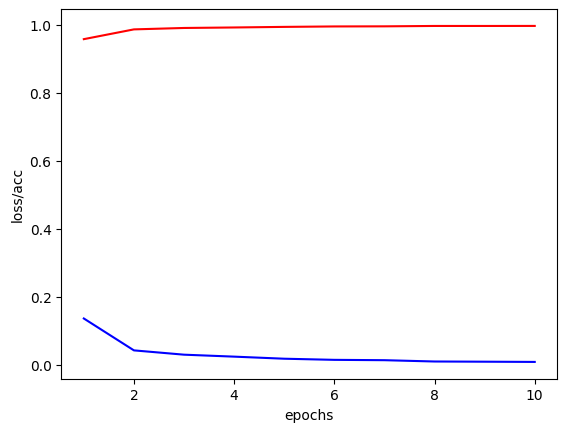

In [16]:
#
# [DIY-1] training history를 이용홰서 loss와 accuracy 그래프 그리기
#
import matplotlib.pyplot as plt

loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

In [17]:
#
# [DIY-2] test 데이터에 모델 적용하고 정확도 계산
#
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)


313/313 [==============================] - 3s 10ms/step - loss: 0.0279 - accuracy: 0.9916
테스트 정확도: 0.991599977016449


----------------

In [ ]:
#
# [Prj-3] test 데이터를 validation으로 설정해서 모델을 다시 훈련시키시오.
# 그리고 training history를 이용해서 loss, val_loss와 accuracy, val-accuracy 그래프 그리기
# file name: dlxx_prj03_CNN_MNIST.ipynb
# 깃허브의 project 폴더에 저장하시오.
#

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 77s 40ms/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.0287 - val_accuracy: 0.9934
Epoch 2/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0080 - accuracy: 0.9971 - val_loss: 0.0375 - val_accuracy: 0.9924
Epoch 3/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0422 - val_accuracy: 0.9924
Epoch 4/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.0444 - val_accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0438 - val_accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0452 - val_accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0425 -

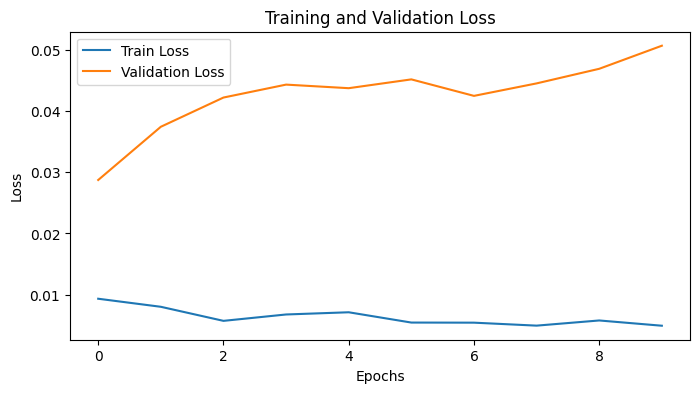

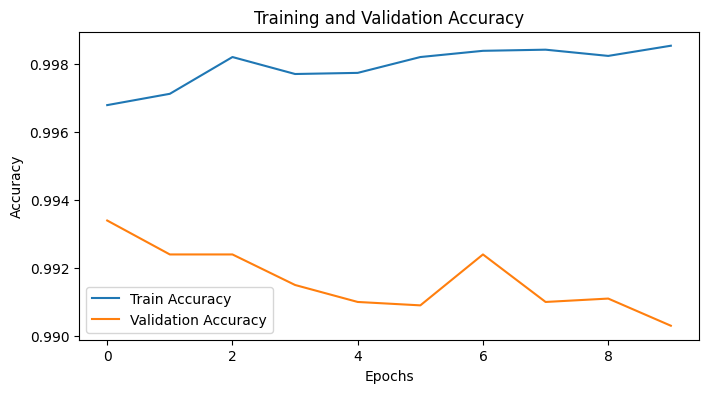

In [19]:
import matplotlib.pyplot as plt

# 훈련 손실과 검증 손실 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 훈련 정확도와 검증 정확도 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()